In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import math
import copy

Decision Trees (DTs) are a non-parametric supervised learning method used for <b><i>classification</i></b> and <b><i>regression</i></b>. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

# Decision Tree Regression Problem

## Dataset
<p>Boston house-prices dataset (regression) taken from sklearn.datasets</p>

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
data, labels = boston.data, boston.target

boston_df = pd.DataFrame(data, columns = boston.feature_names)
boston_df['OUT'] = labels

In [ ]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,OUT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, random_state = 0, test_size = 0.2)
print(x_train.shape, y_train.shape)

(404, 13) (404,)


## Model Building for various criterion

<p> Criterion = (mean squared error - mse),</br> (friedman_mse - which uses mean squared error with Friedman’s improvement score),</br> (mae - for the mean absolute error, which minimizes the L1 loss using the median of each terminal node),</br> (poisson - which uses reduction in Poisson)</p>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

### Criterion loss and accuracy check

In [ ]:
criteria = ["mse", "friedman_mse", "mae"]

for c in criteria:
    lt = []
    lv = []

    print(f"Criterion = {c}")
    for md in range(1, 6):
        model = DecisionTreeRegressor(criterion = c, max_depth = md, random_state = 0)
        model = model.fit(x_train, y_train)
        y_ptrain = model.predict(x_train)
        y_pval  = model.predict(x_val)

        lt = mean_squared_error(y_train, y_ptrain)
        lv = mean_squared_error(y_val, y_pval)

        print(f"Depth = {md}, Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")
    print()

Criterion = mse
Depth = 1, Loss Train = 44.83, Loss Validation = 61.38
Depth = 2, Loss Train = 23.27, Loss Validation = 35.41
Depth = 3, Loss Train = 14.55, Loss Validation = 33.41
Depth = 4, Loss Train = 9.02, Loss Validation = 35.88
Depth = 5, Loss Train = 5.9, Loss Validation = 32.04

Criterion = friedman_mse
Depth = 1, Loss Train = 44.83, Loss Validation = 61.38
Depth = 2, Loss Train = 23.27, Loss Validation = 35.41
Depth = 3, Loss Train = 14.55, Loss Validation = 33.41
Depth = 4, Loss Train = 9.02, Loss Validation = 35.88
Depth = 5, Loss Train = 5.9, Loss Validation = 30.26

Criterion = mae
Depth = 1, Loss Train = 46.56, Loss Validation = 50.27
Depth = 2, Loss Train = 25.46, Loss Validation = 31.39
Depth = 3, Loss Train = 17.2, Loss Validation = 31.8
Depth = 4, Loss Train = 9.53, Loss Validation = 33.88
Depth = 5, Loss Train = 5.36, Loss Validation = 32.0



## Checking with other Algorithms
1. Linear Regression
2. Ridge
3. Lasso
4. GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 19.33, Loss Validation = 33.45


In [ ]:
from sklearn.linear_model import Ridge
linear_model = Ridge()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 19.49, Loss Validation = 34.23


In [ ]:
from sklearn.linear_model import Lasso
linear_model = Lasso()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 24.09, Loss Validation = 41.7


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
linear_model = GradientBoostingRegressor()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 1.53, Loss Validation = 17.92


# Decision Tree Classification Problem

## Dataset
<h4>Data is taken from sklearn.datasets, the data is classification of images to recognize which digit from <i>(0 - 9)</i> is present in the image. </h4>

<h4> The image is a <i> 8 x 8 </i> pixels taken as a vector with 64 features. The class are from <i> (0 - 9).</i> Total samples 1797 </h4>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

data, labels = digits.data, digits.target
print(data.shape, labels.shape)

(1797, 64) (1797,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.2)
print(x_train.shape, y_train.shape)

(1437, 64) (1437,)


## Model Building and Testing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Criterion (Entropy)

<h4> Creating various models depending on the depth going from <i> (1 - 20) </i> and picking the best model depending on the accuracy and loss, with criteria of splitting fixed to <i><b> Entropy.</b></i> </h4>

In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 7, Min Loss = 1.78, Max Accuracy = 86.0%


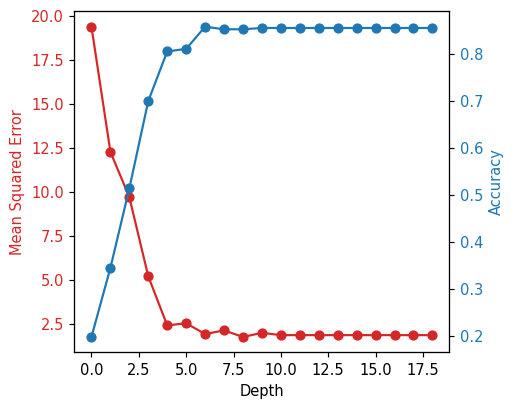

In [ ]:
fig, ax1 = plt.subplots(figsize = (5, 4), dpi = 105)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

## Criterion (Gini)

<h4> Creating various models depending on the depth going from <i> (1 - 20) </i> and picking the best model depending on the accuracy and loss, with criteria of splitting fixed to <i><b> Gini.</b></i> </h4>

In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 14, Min Loss = 2.35, Max Accuracy = 88.0%


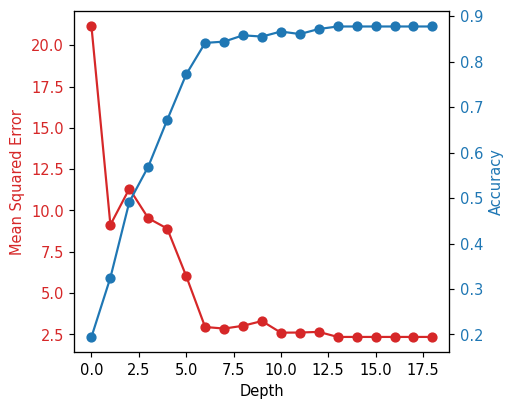

In [ ]:
fig, ax1 = plt.subplots(figsize = (5, 4), dpi = 105)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

## Checking with other Algorithms
1. Linear Regression
2. Ridge
3. Lasso
4. GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 3.25, Loss Validation = 3.71


In [ ]:
from sklearn.linear_model import Ridge
linear_model = Ridge()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 3.25, Loss Validation = 3.68


In [ ]:
from sklearn.linear_model import Lasso
linear_model = Lasso()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 4.38, Loss Validation = 4.61


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
linear_model = GradientBoostingRegressor()
linear_model.fit(x_train, y_train)

y_ptrain = linear_model.predict(x_train)
y_pval  = linear_model.predict(x_val)

lt = mean_squared_error(y_train, y_ptrain)
lv = mean_squared_error(y_val, y_pval)

print(f"Loss Train = {round(lt, 2)}, Loss Validation = {round(lv, 2)}")

Loss Train = 0.71, Loss Validation = 1.58


# Best Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 14, max_features = None)
model = model.fit(x_train, y_train)
y_pred_val = model.predict(x_val)
y_pred_train = model.predict(x_train)

### Accuracy Score

In [ ]:
v_acc = accuracy_score(y_pred_val, y_val)
t_acc = accuracy_score(y_pred_train, y_train)

print(f"Train Accuracy = {t_acc * 100}%, Validaton Accuracy = {v_acc * 100}%")

Train Accuracy = 100.0%, Validaton Accuracy = 87.77777777777777%


### Precison Score

In [ ]:
from sklearn.metrics import precision_score

v_pre = precision_score(y_pred_val, y_val, average = 'weighted')
t_pre = precision_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Precision] = {t_pre}, Validaton [Precision] = {v_pre}")

Train [Precision] = 1.0, Validaton [Precision] = 0.880396408313075


### Recall Score

In [ ]:
from sklearn.metrics import recall_score

v_rec = recall_score(y_pred_val, y_val, average = 'weighted')
t_rec = recall_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Recall] = {t_rec}, Validaton [Recall] = {v_rec}")

Train [Recall] = 1.0, Validaton [Recall] = 0.8777777777777778


### F1 - Score

In [ ]:
from sklearn.metrics import f1_score

v_f = f1_score(y_pred_val, y_val, average = 'weighted')
t_f = f1_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [F1 Score] = {t_f}, Validaton [F1 Score] = {v_f}")

Train [F1 Score] = 1.0, Validaton [F1 Score] = 0.8778872893727697


### Wine Dataset

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
 
data, labels = wine.data, wine.target
print(data.shape, labels.shape)

(178, 13) (178,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.2)
print(x_train.shape, y_train.shape)

(142, 13) (142,)


In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 3, Min Loss = 0.03, Max Accuracy = 97.0%


In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 4, Min Loss = 0.03, Max Accuracy = 97.0%


### Breast Cancer Data

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
 
data, labels = cancer.data, cancer.target
print(data.shape, labels.shape)

(569, 30) (569,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.2)
print(x_train.shape, y_train.shape)

(455, 30) (455,)


In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 3, Min Loss = 0.08, Max Accuracy = 92.0%


In [ ]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [ ]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 5, Min Loss = 0.05, Max Accuracy = 95.0%
